# Wordmap
### Create a wordmap with a particular shape: a hashtag wordmap

In [ ]:
# requires a table in the following format

# index  tag              count
# 0      bonn             381
# 1      hofgarten        181
# 2      fridaysforfuture 113
# 3      unibonn          71

import pandas as pd
df = pd.read_excel("hashtag_count.xlsx")

In [ ]:
# wordcloud generator requires a space-separated string 
# first create a list

dlist = []
for index, row in df.iterrows():
    print(row.tag)
    dlist = dlist + [str(row.tag)]*row["count"]  

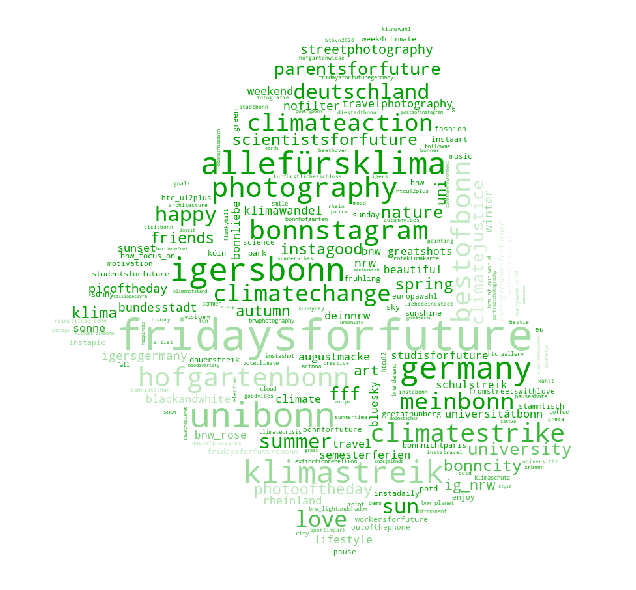

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator   
from PIL import Image  
import numpy as np  
import matplotlib.pyplot as plt  
from random import shuffle

# shuffle list and create string from list
shuffle(dlist)
words = ' '.join(dlist) 

stopwords=["bonn","hofgarten"] # define some stopwords if needed

mask = np.array(Image.open("ParkPNG/hofgarten.png")) # a png mask for wordmap shape
image_colors = ImageColorGenerator(mask) # take this png's colors
  
def wordmap(words, mask):  
    word_cloud = WordCloud(width = 1000, height = 1000,max_words=200,  
                           background_color='white', stopwords=stopwords,  
                           mask=mask).generate(words)  
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')  
    plt.imshow(word_cloud.recolor(color_func=image_colors)) 
    plt.axis('off')  
    plt.tight_layout(pad=0)  
    plt.savefig("Wordmaps/Hofgarten.png", format="png")  
    plt.show()  
       
wordmap(words, mask) 